In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.stats as stats
from scipy.stats import kurtosis, skew
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [3]:
df=pd.read_csv("/content/BrainTumor.csv")
df.head()

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID                   2000 non-null   int64  
 1   Age                          2000 non-null   int64  
 2   Gender                       2000 non-null   object 
 3   Tumor Type                   2000 non-null   object 
 4   Tumor Grade                  2000 non-null   object 
 5   Tumor Location               2000 non-null   object 
 6   Treatment                    2000 non-null   object 
 7   Treatment Outcome            2000 non-null   object 
 8   Time to Recurrence (months)  1438 non-null   float64
 9   Recurrence Site              1438 non-null   object 
 10  Survival Time (months)       2000 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 172.0+ KB


In [5]:
df.shape

(2000, 11)

In [6]:
df.describe()

,Patient ID,Age,Time to Recurrence (months),Survival Time (months)
count,2000.000000,2000.000000,1438.000000,2000.000000
mean,1000.500000,56.153000,16.099444,34.270000
std,577.494589,6.078492,3.128291,8.606343
min,1.000000,42.000000,6.000000,9.000000
25%,500.750000,51.000000,14.000000,28.000000
50%,1000.500000,56.000000,16.000000,36.000000
75%,1500.250000,61.000000,18.000000,42.000000
max,2000.000000,72.000000,36.000000,72.000000


In [7]:
df["Treatment Outcome"].unique()

array(['Partial response', 'Complete response', 'Progressive disease',
       'Stable disease'], dtype=object)

In [8]:
df['Recurrence Site'].unique()

array(['Temporal lobe', nan, 'Frontal lobe', 'Parietal lobe',
       'Occipital lobe'], dtype=object)

In [9]:
df.dtypes

Patient ID                       int64
Age                              int64
Gender                          object
Tumor Type                      object
Tumor Grade                     object
Tumor Location                  object
Treatment                       object
Treatment Outcome               object
Time to Recurrence (months)    float64
Recurrence Site                 object
Survival Time (months)           int64
dtype: object

In [10]:
df2=df.copy()

In [11]:
df2['Recurrence Site']=df2["Recurrence Site"].fillna("Not Applicable")

In [12]:
df2["Time to Recurrence (months)"] = df2["Time to Recurrence (months)" ].fillna(-1)


In [13]:
df2['Time to Recurrence (months)'].unique()

array([10., -1., 14., 24.,  8., 12., 18.,  6.,  9., 16., 20., 36., 22.,
       26.])

In [14]:
df2.isnull().sum()

Patient ID                     0
Age                            0
Gender                         0
Tumor Type                     0
Tumor Grade                    0
Tumor Location                 0
Treatment                      0
Treatment Outcome              0
Time to Recurrence (months)    0
Recurrence Site                0
Survival Time (months)         0
dtype: int64

In [15]:
clean_df=df2.copy()

In [16]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID                   2000 non-null   int64  
 1   Age                          2000 non-null   int64  
 2   Gender                       2000 non-null   object 
 3   Tumor Type                   2000 non-null   object 
 4   Tumor Grade                  2000 non-null   object 
 5   Tumor Location               2000 non-null   object 
 6   Treatment                    2000 non-null   object 
 7   Treatment Outcome            2000 non-null   object 
 8   Time to Recurrence (months)  2000 non-null   float64
 9   Recurrence Site              2000 non-null   object 
 10  Survival Time (months)       2000 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 172.0+ KB


In [17]:
def histplots(df):
  for column in df.columns:
    if df[column].dtype=="int64" or df[column].dtype=="float64":
      fig, axes = plt.subplots(1, 1, figsize=(5, 5))
      sns.histplot(data=df,x=column,kde=True)
      plt.show()

In [18]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID                   2000 non-null   int64  
 1   Age                          2000 non-null   int64  
 2   Gender                       2000 non-null   object 
 3   Tumor Type                   2000 non-null   object 
 4   Tumor Grade                  2000 non-null   object 
 5   Tumor Location               2000 non-null   object 
 6   Treatment                    2000 non-null   object 
 7   Treatment Outcome            2000 non-null   object 
 8   Time to Recurrence (months)  2000 non-null   float64
 9   Recurrence Site              2000 non-null   object 
 10  Survival Time (months)       2000 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 172.0+ KB


In [19]:
a=[]
# Iterate over columns and check dtype
for column in clean_df.columns:
    if clean_df[column].dtype == 'int64' or clean_df[column].dtype == 'float64' :
         a.append(column)

print(a)

['Patient ID', 'Age', 'Time to Recurrence (months)', 'Survival Time (months)']


In [146]:
for column in clean_df.columns:
  if clean_df[column].dtype=="int64" or clean_df[column].dtype == 'float64':
    print(column)
clean_df.drop("Patient ID",inplace=True,axis=1)

Patient ID
Age
Time to Recurrence (months)
Survival Time (months)


Visualizing Numerical Distribution

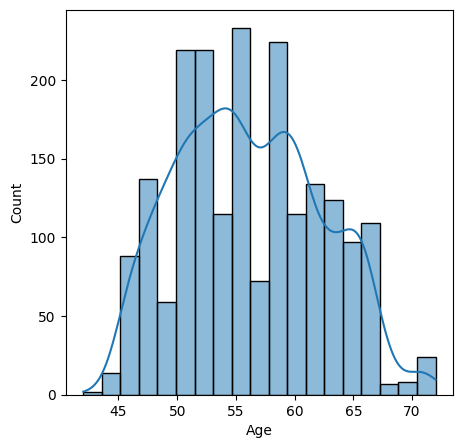

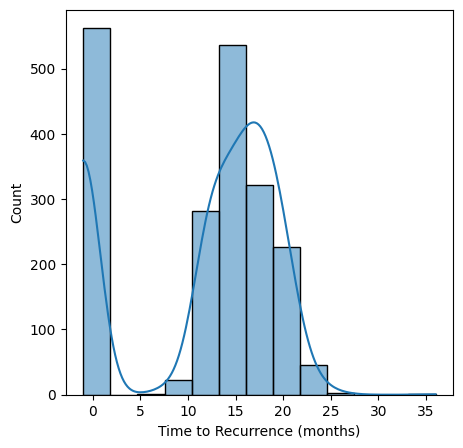

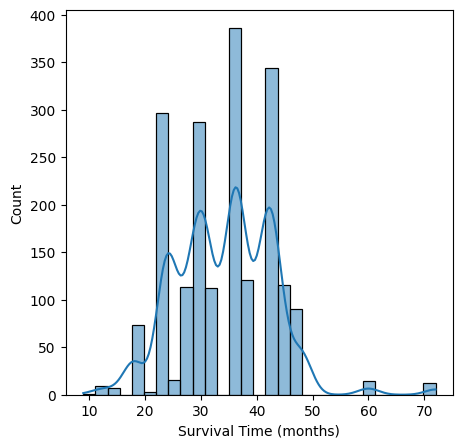

In [147]:
histplots(clean_df)

In [148]:
skewness = skew(clean_df["Time to Recurrence (months)"])
kurt = kurtosis(clean_df["Time to Recurrence (months)"], fisher=False)
print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurt}')

Skewness: -0.6282224884824958
Kurtosis: 1.8489990962140903


Applying Transformations on few Numerical Columns


In [150]:
numerical_column=clean_df[clean_df.columns[(clean_df.dtypes=="int64")|(clean_df.dtypes=="float64")]]

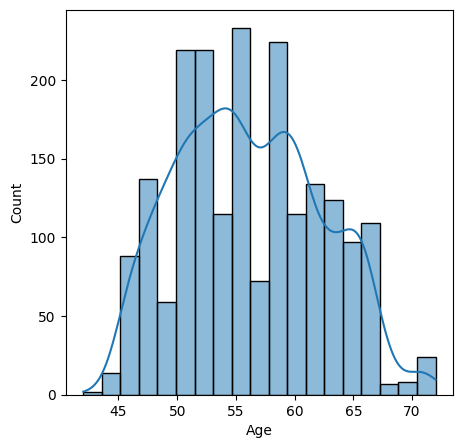

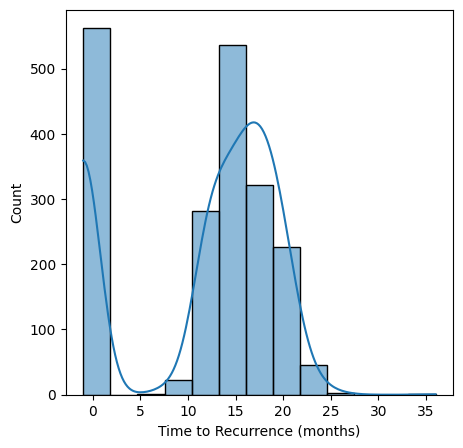

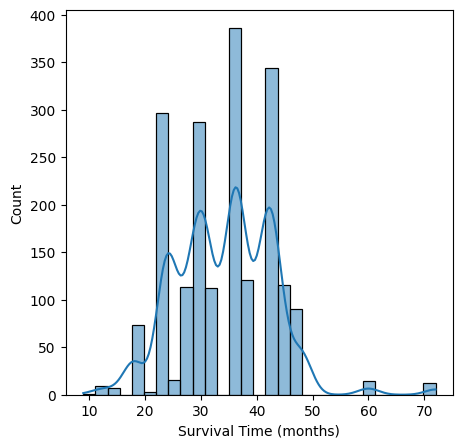

In [151]:
transformed=numerical_column.copy()
def log_transformation(column):
  for i in df.column:
    transformed[i] = np.log(transformed[i]+(transformed[i].mean()+transformed[i].median()-1)*0.01)
histplots(transformed)

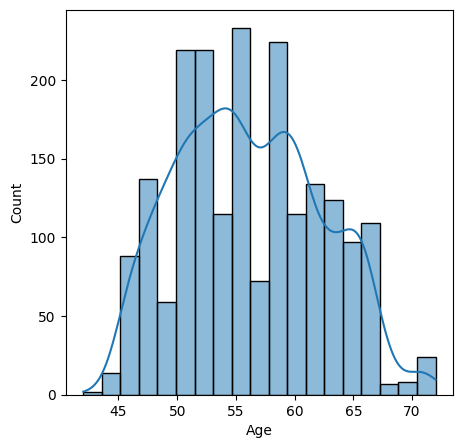

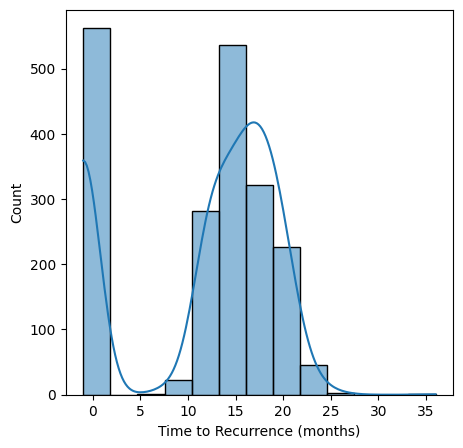

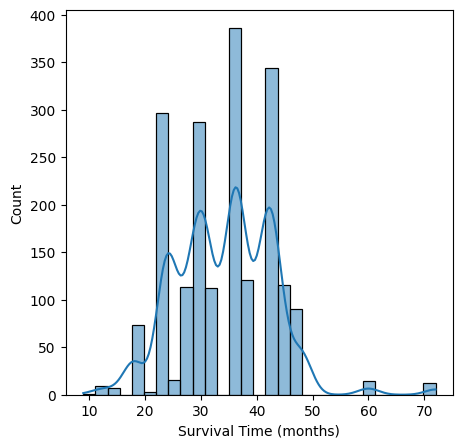

In [152]:
def power_transformation(column):
  for i in df.column:
    transformed[i] = np.power(transformed[i],1/5)
histplots(transformed)

In [153]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          2000 non-null   int64  
 1   Gender                       2000 non-null   object 
 2   Tumor Type                   2000 non-null   object 
 3   Tumor Grade                  2000 non-null   object 
 4   Tumor Location               2000 non-null   object 
 5   Treatment                    2000 non-null   object 
 6   Treatment Outcome            2000 non-null   object 
 7   Time to Recurrence (months)  2000 non-null   float64
 8   Recurrence Site              2000 non-null   object 
 9   Survival Time (months)       2000 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 156.4+ KB


CHOOSING CATEGORICAL VARIABLES

In [154]:
categorical_columns=clean_df[clean_df.columns[clean_df.dtypes=="object"]]

In [28]:
categorical_columns.head()

,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Recurrence Site
0,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,Temporal lobe
1,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,Not Applicable
2,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,Frontal lobe
3,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,Not Applicable
4,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,Frontal lobe


In [29]:
for column in categorical_columns:
  if categorical_columns[column].dtype=="object":
    categorical_columns[column] = categorical_columns[column].astype('category')

categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             2000 non-null   category
 1   Tumor Type         2000 non-null   category
 2   Tumor Grade        2000 non-null   category
 3   Tumor Location     2000 non-null   category
 4   Treatment          2000 non-null   category
 5   Treatment Outcome  2000 non-null   category
 6   Recurrence Site    2000 non-null   category
dtypes: category(7)
memory usage: 15.2 KB


<ipython-input-29-2ac395e23bb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns[column] = categorical_columns[column].astype('category')
<ipython-input-29-2ac395e23bb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns[column] = categorical_columns[column].astype('category')
<ipython-input-29-2ac395e23bb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [30]:
categorical_columns.head()

,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Recurrence Site
0,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,Temporal lobe
1,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,Not Applicable
2,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,Frontal lobe
3,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,Not Applicable
4,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,Frontal lobe


In [31]:
categorical_columns["Recurrence Site"].value_counts()

Recurrence Site
Not Applicable    562
Frontal lobe      414
Temporal lobe     381
Parietal lobe     367
Occipital lobe    276
Name: count, dtype: int64

In [32]:
transformed

,Patient ID,Age,Time to Recurrence (months),Survival Time (months)
0,1,45,10.0,18
1,2,55,-1.0,36
2,3,60,14.0,22
3,4,50,-1.0,12
4,5,65,24.0,48
...,...,...,...,...
1995,1996,49,18.0,32
1996,1997,57,-1.0,38
1997,1998,45,20.0,44
1998,1999,62,22.0,28


NORMALIZING NUMERICAL COLUMNS

In [33]:
scalar = MinMaxScaler()

In [34]:
transformed.drop("Patient ID",inplace=True,axis=1)

In [35]:
for column in transformed.columns:
  transformed[column]=scalar.fit_transform(transformed[[column]])


In [36]:
transformed

,Age,Time to Recurrence (months),Survival Time (months)
0,0.100000,0.297297,0.142857
1,0.433333,0.000000,0.428571
2,0.600000,0.405405,0.206349
3,0.266667,0.000000,0.047619
4,0.766667,0.675676,0.619048
...,...,...,...
1995,0.233333,0.513514,0.365079
1996,0.500000,0.000000,0.460317
1997,0.100000,0.567568,0.555556
1998,0.666667,0.621622,0.301587


In [37]:
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             2000 non-null   category
 1   Tumor Type         2000 non-null   category
 2   Tumor Grade        2000 non-null   category
 3   Tumor Location     2000 non-null   category
 4   Treatment          2000 non-null   category
 5   Treatment Outcome  2000 non-null   category
 6   Recurrence Site    2000 non-null   category
dtypes: category(7)
memory usage: 15.2 KB


In [38]:
one_hot=[]
for column in categorical_columns.columns:
  if column != "Tumor Grade" and column != "Recurrence Site":
    one_hot.append(column)

APPLYING ONE_HOT ENCODING AND LABEL_ENCODING

In [39]:
onehot = pd.get_dummies(categorical_columns[one_hot])

In [40]:
onehot

,Gender_Female,Gender_Male,Tumor Type_Astrocytoma,Tumor Type_Glioblastoma,Tumor Type_Meningioma,Tumor Location_Frontal lobe,Tumor Location_Occipital lobe,Tumor Location_Parietal lobe,Tumor Location_Temporal lobe,Treatment_Chemotherapy,Treatment_Chemotherapy + Radiation,Treatment_Radiation,Treatment_Surgery,Treatment_Surgery + Chemotherapy,Treatment_Surgery + Radiation,Treatment_Surgery + Radiation therapy,Treatment Outcome_Complete response,Treatment Outcome_Partial response,Treatment Outcome_Progressive disease,Treatment Outcome_Stable disease
0,False,True,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False
1,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
2,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
3,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False
4,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1996,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False
1997,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False
1998,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True


In [41]:
for column in categorical_columns.columns:
  print(categorical_columns[column].unique())


['Male', 'Female']
Categories (2, object): ['Female', 'Male']
['Glioblastoma', 'Meningioma', 'Astrocytoma']
Categories (3, object): ['Astrocytoma', 'Glioblastoma', 'Meningioma']
['IV', 'I', 'III', 'II']
Categories (4, object): ['I', 'II', 'III', 'IV']
['Frontal lobe', 'Parietal lobe', 'Occipital lobe', 'Temporal lobe']
Categories (4, object): ['Frontal lobe', 'Occipital lobe', 'Parietal lobe', 'Temporal lobe']
['Surgery', 'Surgery + Chemotherapy', 'Surgery + Radiation therapy', 'Surgery + Radiation', 'Chemotherapy', 'Radiation', 'Chemotherapy + Radiation']
Categories (7, object): ['Chemotherapy', 'Chemotherapy + Radiation', 'Radiation', 'Surgery',
                         'Surgery + Chemotherapy', 'Surgery + Radiation', 'Surgery + Radiation therapy']
['Partial response', 'Complete response', 'Progressive disease', 'Stable disease']
Categories (4, object): ['Complete response', 'Partial response', 'Progressive disease',
                         'Stable disease']
['Temporal lobe', 'Not A

In [42]:
categorical_columns["Recurrence Site"].unique()

['Temporal lobe', 'Not Applicable', 'Frontal lobe', 'Parietal lobe', 'Occipital lobe']
Categories (5, object): ['Frontal lobe', 'Not Applicable', 'Occipital lobe', 'Parietal lobe',
                         'Temporal lobe']

In [43]:
label_encode=categorical_columns[["Tumor Grade","Recurrence Site"]]
label_encode["Tumor Grade"]=label_encode['Tumor Grade'].map({"IV":3, 'I':0, 'III':2, 'II':1})
label_encode["Recurrence Site"] = label_encode["Recurrence Site"].map({'Frontal lobe':0 ,'Parietal lobe':1 ,'Occipital lobe':2 ,'Temporal lobe':3,"Not Applicable":4})

<ipython-input-43-2aa8179c4ec7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_encode["Tumor Grade"]=label_encode['Tumor Grade'].map({"IV":3, 'I':0, 'III':2, 'II':1})
<ipython-input-43-2aa8179c4ec7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_encode["Recurrence Site"] = label_encode["Recurrence Site"].map({'Frontal lobe':0 ,'Parietal lobe':1 ,'Occipital lobe':2 ,'Temporal lobe':3,"Not Applicable":4})


In [44]:
label_encode

,Tumor Grade,Recurrence Site
0,3,3
1,0,4
2,2,0
3,3,4
4,1,0
...,...,...
1995,0,1
1996,3,4
1997,0,3
1998,2,0


In [45]:
final_df = pd.concat([onehot,transformed],axis=1)

In [46]:
final_df = pd.concat([label_encode,final_df],axis=1)

In [58]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Tumor Grade                            2000 non-null   category
 1   Recurrence Site                        2000 non-null   category
 2   Gender_Female                          2000 non-null   bool    
 3   Gender_Male                            2000 non-null   bool    
 4   Tumor Type_Astrocytoma                 2000 non-null   bool    
 5   Tumor Type_Glioblastoma                2000 non-null   bool    
 6   Tumor Type_Meningioma                  2000 non-null   bool    
 7   Tumor Location_Frontal lobe            2000 non-null   bool    
 8   Tumor Location_Occipital lobe          2000 non-null   bool    
 9   Tumor Location_Parietal lobe           2000 non-null   bool    
 10  Tumor Location_Temporal lobe           2000 non-null   bool 

SEARCHING BEST HYPERPARAMETERS FOR MODEL

In [83]:
from sklearn.tree import DecisionTreeClassifier
X=np.array(final_df.drop(["Recurrence Site","Time to Recurrence (months)"],axis=1))
y=np.array(final_df[["Recurrence Site"]])
params_grid={"criterion":["gini", "entropy", "log_loss"],"splitter":["best", "random"],"max_depth":[10,20,50,100],"min_samples_split":[2,4,12],'min_samples_leaf':[1,2,4,5]}
tree = DecisionTreeClassifier()
Grid=GridSearchCV(tree,param_grid=params_grid)

In [84]:
Grid.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 4, 12],
                         'splitter': ['best', 'random']})

In [85]:
Grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [86]:
Grid.best_score_

0.9960000000000001

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42,stratify=y)
tree=DecisionTreeClassifier(criterion ='gini', max_depth = 10 , min_samples_leaf = 1 , min_samples_split = 4 ,splitter = 'best')
tree.fit(X_train,y_train)
y_predict=tree.predict(X_test)


In [89]:
y_predict

array([4, 3, 1, 4, 1, 3, 0, 3, 3, 0, 2, 4, 4, 3, 3, 4, 4, 0, 4, 1, 3, 3,
       0, 1, 4, 3, 0, 0, 1, 0, 2, 0, 2, 4, 0, 4, 2, 4, 3, 1, 0, 1, 2, 3,
       1, 3, 3, 1, 3, 3, 0, 0, 4, 4, 4, 1, 2, 2, 3, 4, 1, 2, 3, 3, 0, 3,
       4, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 4, 0, 2, 1, 4, 4, 3, 4, 4, 3, 2,
       3, 1, 4, 0, 4, 0, 0, 0, 2, 4, 1, 4, 0, 3, 1, 0, 3, 4, 1, 2, 1, 0,
       4, 4, 4, 4, 4, 2, 0, 1, 4, 2, 1, 3, 0, 3, 0, 1, 2, 3, 0, 2, 2, 3,
       2, 1, 3, 3, 0, 0, 2, 3, 1, 1, 3, 1, 1, 0, 2, 3, 4, 4, 0, 1, 4, 0,
       4, 2, 1, 3, 3, 4, 2, 4, 0, 0, 4, 3, 0, 4, 4, 4, 4, 3, 4, 1, 0, 2,
       4, 1, 0, 0, 4, 1, 0, 1, 0, 0, 0, 4, 3, 1, 0, 1, 0, 0, 0, 4, 4, 2,
       0, 0, 0, 1, 3, 1, 1, 2, 2, 0, 2, 0, 0, 4, 1, 1, 1, 0, 4, 2, 2, 3,
       2, 4, 2, 2, 4, 1, 4, 0, 0, 2, 1, 4, 4, 3, 4, 3, 4, 4, 0, 1, 0, 1,
       3, 4, 4, 2, 4, 3, 2, 4, 1, 3, 4, 1, 4, 3, 0, 2, 2, 0, 0, 3, 0, 3,
       3, 1, 0, 3, 1, 3, 0, 3, 3, 4, 3, 1, 3, 4, 2, 2, 0, 0, 1, 4, 3, 4,
       1, 0, 4, 0, 1, 1, 0, 3, 4, 1, 4, 1, 1, 1, 2,

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[137,   0,   0,   0,   0],
       [  0, 121,   0,   0,   0],
       [  1,   0,  90,   0,   0],
       [  1,   0,   0, 125,   0],
       [  2,   0,   0,   0, 183]])

In [91]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predict)

In [92]:
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       137
           1       1.00      1.00      1.00       121
           2       1.00      0.99      0.99        91
           3       1.00      0.99      1.00       126
           4       1.00      0.99      0.99       185

    accuracy                           0.99       660
   macro avg       0.99      0.99      0.99       660
weighted avg       0.99      0.99      0.99       660



In [93]:
from sklearn.metrics import accuracy_score
print(f"Accuracy Score : {accuracy_score(y_test,y_predict)}")

Accuracy Score : 0.9939393939393939


In [94]:
predicted_y=tree.predict(X)

In [96]:
X.shape

(2000, 23)

In [103]:
predicted_y=predicted_y.reshape((2000,1))

In [104]:
predicted_y.shape

(2000, 1)

In [108]:
new_X=np.concatenate((X, predicted_y), axis=1)

In [109]:
new_X.shape

(2000, 24)

In [134]:
from sklearn.tree import DecisionTreeRegressor
y=np.array(final_df[["Time to Recurrence (months)"]])
params_grid={"criterion":['friedman_mse'], "splitter":['best'], 'max_depth':[21,22,23,30], "min_samples_split":[2], "min_samples_leaf":[3]}
tree = DecisionTreeRegressor()
Grid=GridSearchCV(tree,param_grid=params_grid)

In [135]:
Grid.fit(new_X,y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['friedman_mse'],
                         'max_depth': [21, 22, 23, 30], 'min_samples_leaf': [3],
                         'min_samples_split': [2], 'splitter': ['best']})

In [136]:
Grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 21,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [137]:
Grid.best_score_

0.9341407570668097

In [140]:
X_train,X_test,y_train,y_test=train_test_split(new_X,y,test_size=0.33,random_state=42)
tree=DecisionTreeRegressor(criterion = 'friedman_mse',
 max_depth= 14,
 min_samples_leaf= 2,min_samples_split= 2,splitter = 'best')
tree.fit(X_train,y_train)
y_predict=tree.predict(X_test)

In [141]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
print(mse)